<a href="https://colab.research.google.com/github/supernova236/SantaHulk/blob/main/swproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 천문우주학과 임태욱 2021135034

# Custom data로 이미지 분류하기!


## 개요

 기계가 사진 속의 물체들을 분류할 수 있도록 하는 것은 오랫동안 중요한 문제로 여겨져왔다.


 예를 들어 아래와 같은 두 사진을 보자.

 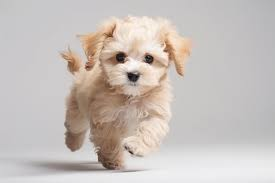

 ![image.pn](https://health.chosun.com/site/data/img_dir/2023/07/17/2023071701753_0.jpg)

우리는 이 사진들을 기계에게 주고, 기계가 이 사진 속의 동물이 강아지인지 고양이인지 알려주기를 원한다.

이렇게 사진 속의 물체나 동물을 분류하는 일을 image classification 이라고 하는데, 이는 많은 산업 분야에 응용 될 수 있어서 매우 유용하다.

이를테면, 자율주행하는 차가 앞에있는 물체가 사람인지 차인지 분류하는 것 같은 종류의 일이 있다.

이 같은 학습을 위해서는 기계를 훈련시킬 많은 양의 이미지 데이터가 필요하다.

'

'

그러나 앞서 말했던 강아지, 고양이 분류 문제와 달리 대부분의 문제에 있어서는 우리가 원하는 이미지 데이터가 존재하지 않는다.

이에, 우리가 원하는 이미지 분류 문제를 설정하고, 이에 맞는 데이터를 모아서 기계를 직접 학습시키고, 그 결과를 보는 작업을 해보고자 하였다.

## 문제 설정

 크리스마스가 다가왔기 때문에, 산타 분류 문제를 풀어 보고자 하였다.

 '

 '

 상황은 다음과 같다.

 크리스마스 이브 늦은 밤, 모두가 잠들어 있을 때 누군가가 문을 두들긴다.

 우리는 모두 자고 있기 때문에, 집을 지키는 우리의 기계가 문을 두들긴 자의 정체를 파악해야 한다.

 만약 문을 두들긴 자가 산타라면 선물을 두고 갈 수 있게 문을 열어주면 되고, 헐크일 경우 알람 경보를 울려야 할 것이다.

![image.png](https://an-talla.co.uk/wp-content/uploads/2022/09/Santa-social-Edited.png)
![image.png](https://a1cf74336522e87f135f-2f21ace9a6cf0052456644b80fa06d4f.ssl.cf2.rackcdn.com/images/characters/large/800/The-Hulk.The-Incredible-Hulk.webp)



## 훈련 방법

먼저, 여러가지 방법을 이용해서 산타와 헐크 이미지를 모아서 데이터셋을 구축한다.

그후, 이 Custom 데이터 셋을 이용하여 우리들의 여러 모델들을 잘 훈련 시킬 수 있는 방법을 모색한다.


'

'

본 프로젝트에서는 다음과 같은 순서로 진행되었다.

'

'

1. 구글 Crop을 통해 image set 구축하기.
2. Bing downloader를 통해 image set 구축하기.
3. Custom model 구축
4. Resnet50을 이용해 model 구축
5. Sobel filter 적용 후 model 적용

'

'

---

Dataset 모으기

'

'


먼저, 직접 Google image를 통해 캡쳐를 하고 모으는 것은 주관이 많이 들어가고, 시간이 오래 걸리며 이미지의 퀄리티와 양의 문제가 있었다.

결과적으로 직접 모은 data는 잘 학습이 되지 않았다.

그래서 bing downloader라는 library를 통해 더 많은 이미지를 모으고자 하였다.

'
'

---
Model 구축하기

'

'

3층의 Convolutional layer와 1층의 Fully connected layer를 이용하여 Custom model을 구축해보았다.

우리의 모델은 잘 학습이 되었고, 고전적인 산타와 헐크 분류에서는 좋은 성능을 보였다.

그러나 고전적이지 않은 모습들, 이를테면 빨간 헐크의 경우는 산타로 분류하는 것을 알 수 있었다.

즉, 훈련 데이터가 적은만큼, 빨간색 feature를 산타로 인식하고 학습했을 가능성이 높았다.


'

'

이에, 작은 dataset으로 좋은 성능을 낼 수 있는 방법을 모색하던 중, 전이 학습을 떠올리게 되었고, Resnet50을 이용하여 전이학습을 진행하였다.

전이 학습을 통해 얻은 model은 모든 산타와 헐크에 대해서 아주 우수한 예측 결과를 보였다.



# Custom dataset 만들기 연습!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
from torchvision import transforms
import time
from tqdm.autonotebook import tqdm
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import inspect
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%cd /content/drive/MyDrive/SWPROGRAMMING/testdata
!pwd
!mkdir train
!mkdir test
# image dataset을 위한 data 폴더 만들기!
!ls

/content/drive/MyDrive/SWPROGRAMMING/testdata
/content/drive/MyDrive/SWPROGRAMMING/testdata
test  train


In [ ]:
%cd /content/drive/MyDrive/SWPROGRAMMING/testdata/train
!pwd
# 현재 폴더 확인!

# data 폴더로 이동!

/content/drive/MyDrive/SWPROGRAMMING/testdata/train
/content/drive/MyDrive/SWPROGRAMMING/testdata/train


In [ ]:
!pip install bing-image-downloader
# 느낌표 붙여주기!
# pypi.org 참고 - bing image downloader 설치!

In [ ]:
from bing_image_downloader import downloader
downloader.download("santa claus", limit=10, output_dir='Santa')

# 검색할 내용, 최대 이미지 갯수, 이미지가 담길 폴더 이름 입력!

[%] Downloading Images to /content/drive/MyDrive/SWPROGRAMMING/testdata/Santa/santa claus


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://muskoka411.com/start/wp-content/uploads/2015/12/santa-claus.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://morethanaminute.com/wp-content/uploads/2012/12/santa-claus-pics-0201.jpg
[!] Issue getting: http://morethanaminute.com/wp-content/uploads/2012/12/santa-claus-pics-0201.jpg
[!] Error:: <urlopen error timed out>
[%] Downloading Image #2 from http://www.turnbacktogod.com/wp-content/uploads/2008/12/santa-claus-pics-0101.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://eqmcapital.com/wp-content/uploads/2014/12/santa_claus1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.turnbacktogod.com/wp-content/uploads/2008/12/santa-claus-pics-0112.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://3.bp.blogspot.com/-AnsQpAFZnmU/UHYBilS0LeI/AAAAAAAABv

In [ ]:
downloader.download("Hulk", limit=10, output_dir='Hulk')

[%] Downloading Images to /content/drive/MyDrive/SWPROGRAMMING/testdata/Hulk/Hulk


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://1.bp.blogspot.com/-yqA7ItApZbA/UbGI4iidH5I/AAAAAAAABVk/lRrkCKAp7-s/s1600/Hulk.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallpapercave.com/wp/KoRs0fh.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://coolvibe.com/wp-content/uploads/2011/11/Portrait-Art-Damir-Martin-Hulk-Closer-Look-992x1627.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://blogs-images.forbes.com/markhughes/files/2015/06/Hulk-6-1940x1204.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://4.bp.blogspot.com/-eZEpNnqgv88/T6DOxzQua_I/AAAAAAAACw0/p85ZCL29nOs/s1600/hulk-med.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn.wallpapersafari.com/95/92/AeSY9k.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.cbr.com/wp-content/uploads/2017/07/hulk-mcu.jp

**만든 파일을 train 하위 폴더에 잘 옮겨 준다!**

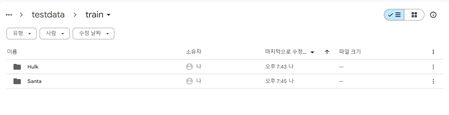

In [3]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms

In [ ]:
transform = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                ])

# 이미지 크기가 다 다르기 때문에 128,128 로 조정해주고 정규화 작업!

trainset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/SWPROGRAMMING/testdata/train",
                                                    transform = transform)



In [ ]:
trainset.__getitem__(9)

# trainset의 10번째 이미지 가져오기!

(tensor([[[-0.9294, -0.9451, -0.9216,  ..., -0.9216, -0.9373, -0.9451],
          [-0.9294, -0.9451, -0.9216,  ..., -0.9216, -0.9294, -0.9373],
          [-0.9294, -0.9373, -0.9216,  ..., -0.9137, -0.9294, -0.9294],
          ...,
          [-0.7412, -0.7490, -0.7412,  ..., -0.6706, -0.8431, -0.8118],
          [-0.7255, -0.7647, -0.7490,  ..., -0.6078, -0.8824, -0.8824],
          [-0.7333, -0.7647, -0.7725,  ..., -0.6078, -0.8510, -0.8980]],
 
         [[-0.7333, -0.7490, -0.7098,  ..., -0.7098, -0.7412, -0.7490],
          [-0.7333, -0.7412, -0.7098,  ..., -0.7098, -0.7333, -0.7412],
          [-0.7333, -0.7333, -0.7098,  ..., -0.7020, -0.7255, -0.7333],
          ...,
          [-0.6549, -0.6627, -0.6549,  ..., -0.5059, -0.7647, -0.7412],
          [-0.6392, -0.6784, -0.6627,  ..., -0.3961, -0.8039, -0.8196],
          [-0.6471, -0.6784, -0.6863,  ..., -0.3804, -0.7725, -0.8353]],
 
         [[-0.9608, -0.9765, -0.9529,  ..., -0.9529, -0.9686, -0.9765],
          [-0.9608, -0.9765,

In [ ]:
img, label = trainset[10]
print(len(trainset))
classes = trainset.classes

# trainset의 class 명 확인!

print(classes)

for i in range(len(trainset)):
    img, label = trainset[i]
    print(label, classes[label])

20
['Hulk', 'Santa']
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa


In [ ]:
trainloader = DataLoader(trainset, batch_size = 8, shuffle = True, num_workers = 1)

# Batch 한개 당 8장의 이미지씩 가져오기!, 이미지는 무작위로 섞기!


In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(labels)
print(images)

# 1번째 batch, 2번째 batch 순으로 이미지 가져와보기!
# 이 코드를 반복하면 처음에는 1번째 batch 다음에는 2번째 batch 순으로 이미지가 8개씩 업로드 된다!

tensor([1, 1, 0, 0, 1, 0, 1, 1])
tensor([[[[ 0.9059,  0.9059,  0.9059,  ...,  0.9059,  0.9059,  0.9059],
          [ 0.9059,  0.9059,  0.9059,  ...,  0.9059,  0.9059,  0.9059],
          [ 0.9059,  0.9059,  0.9059,  ...,  0.9059,  0.9059,  0.9059],
          ...,
          [ 0.9059,  0.9059,  0.9059,  ...,  0.9059,  0.9059,  0.9059],
          [ 0.9059,  0.9059,  0.9059,  ...,  0.9059,  0.9059,  0.9059],
          [ 0.9059,  0.9059,  0.9059,  ...,  0.9059,  0.9059,  0.9059]],

         [[ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980],
          [ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980],
          [ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980],
          ...,
          [ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980],
          [ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980],
          [ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980]],

         [[ 0.8824,  0.8824,  0.8824,  ...,  0.8824,  0.8824,  0.8824

In [ ]:
print(images.shape)

# 이미지 크기 확인!
# Batch 에 8개의 이미지가 있고, RGB 3 class 이며, 각각 128 by 128 임을 확인!

torch.Size([8, 3, 128, 128])


In [15]:
def imshow(img):
    img = img/2 +0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1,2,0)))

    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)

# 이미지 보여주는 함수 정의!

(3, 262, 522)
(262, 522, 3)
torch.Size([8, 3, 128, 128])


'Santa          Santa          Hulk           Hulk           Santa          Hulk           Santa          Santa          '

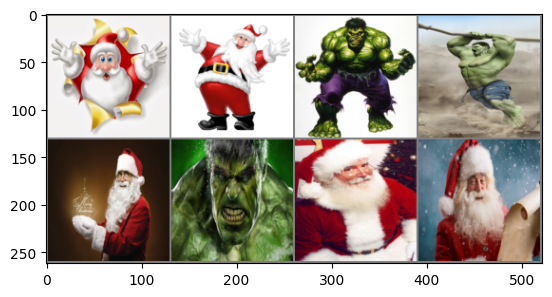

In [ ]:
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
"".join(f"{classes[labels[j]]:15s}" for j in range(8))

# 진짜로 사용할 Custom Data 만들기!
Santa, Hulk

santa 1000장, hulk 1000 장을 다운 받은 후,
train 900장, test 100장으로 나눠 주기!

In [4]:
%cd /content/drive/MyDrive/SWPROGRAMMING/data
!pwd

/content/drive/MyDrive/SWPROGRAMMING/data
/content/drive/MyDrive/SWPROGRAMMING/data


In [ ]:

!mkdir train
!mkdir test
# image dataset을 위한 data 폴더 만들기!
!ls

/content/drive/MyDrive/SWPROGRAMMING/data
/content/drive/MyDrive/SWPROGRAMMING/data
test  train


In [ ]:
downloader.download("santa claus", limit=1000, output_dir='Santa')
downloader.download("Hulk", limit=1000, output_dir='Hulk')

# 검색할 내용, 최대 이미지 갯수, 이미지가 담길 폴더 이름 입력!

[%] Downloading Images to /content/drive/MyDrive/SWPROGRAMMING/data/Santa/santa claus


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://muskoka411.com/start/wp-content/uploads/2015/12/santa-claus.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://morethanaminute.com/wp-content/uploads/2012/12/santa-claus-pics-0201.jpg
[!] Issue getting: http://morethanaminute.com/wp-content/uploads/2012/12/santa-claus-pics-0201.jpg
[!] Error:: <urlopen error timed out>
[%] Downloading Image #2 from http://www.turnbacktogod.com/wp-content/uploads/2008/12/santa-claus-pics-0101.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://eqmcapital.com/wp-content/uploads/2014/12/santa_claus1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.turnbacktogod.com/wp-content/uploads/2008/12/santa-claus-pics-0112.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://3.bp.blogspot.com/-AnsQpAFZnmU/UHYBilS0LeI/AAAAAAAABvs/p4

Bing image 갯수의 한계로 인해 1000개를 받을 수 없었음!

안 좋은 상태의 이미지 제거 후,

Santa class의 경우 train image 30 개, test image 6개
Hulk class 의 경우 train image 45 개, test image 9개로 구성!

In [5]:
# Data pre image processing
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                ])

# 이미지 크기가 다 다르기 때문에 128,128 로 조정해주고 정규화 작업!

trainset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/SWPROGRAMMING/data/train",
                                                    transform = transform)

testset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/SWPROGRAMMING/data/test",
                                                    transform = transform)



In [14]:
img, label = trainset[10]
print(len(trainset))
classes = trainset.classes

# trainset의 class 명 확인!

print(classes)

for i in range(len(trainset)):
    img, label = trainset[i]
    print(label, classes[label])

75
['Hulk', 'Santa']
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa


In [6]:
trainloader = DataLoader(trainset, batch_size = 8, shuffle = True, num_workers = 1)
testloader = DataLoader(testset, batch_size = 8, shuffle = False, num_workers = 1)

# Batch 한개 당 8장의 이미지씩 가져오기!, train 이미지는 무작위로 섞기!


In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(labels)
print(images)

# 1번째 batch, 2번째 batch 순으로 이미지 가져와보기!
# 이 코드를 반복하면 처음에는 1번째 batch 다음에는 2번째 batch 순으로 이미지가 8개씩 업로드 된다!

tensor([0, 0, 0, 1, 0, 0, 0, 0])
tensor([[[[-0.2471, -0.1529,  0.0118,  ...,  0.8980,  0.8902,  0.9059],
          [-0.2235, -0.1137,  0.0039,  ...,  0.9059,  0.8980,  0.8980],
          [-0.1686, -0.0902,  0.0039,  ...,  0.8353,  0.8980,  0.9059],
          ...,
          [ 0.9373,  0.9216,  0.9686,  ...,  0.8745,  0.8745,  0.7961],
          [ 0.9686,  0.9608,  0.9529,  ...,  0.8902,  0.8824,  0.8588],
          [ 0.9608,  0.9373,  0.9529,  ...,  0.8039,  0.8118,  0.8039]],

         [[-0.2314, -0.1922, -0.1059,  ...,  0.5451,  0.5686,  0.5765],
          [-0.2314, -0.1843, -0.1059,  ...,  0.5686,  0.5843,  0.5922],
          [-0.2157, -0.1686, -0.0902,  ...,  0.5216,  0.5843,  0.5922],
          ...,
          [ 0.6941,  0.7490,  0.9137,  ...,  0.2863,  0.3098, -0.3333],
          [ 0.8745,  0.8431,  0.8667,  ...,  0.5922,  0.5451,  0.3255],
          [ 0.9216,  0.8745,  0.8510,  ..., -0.0039, -0.0588, -0.0824]],

         [[-0.2078, -0.2078, -0.1686,  ...,  0.1608,  0.1843,  0.2000

(3, 454, 906)
(454, 906, 3)
torch.Size([8, 3, 224, 224])


'Hulk           Hulk           Hulk           Santa          Hulk           Hulk           Hulk           Hulk           '

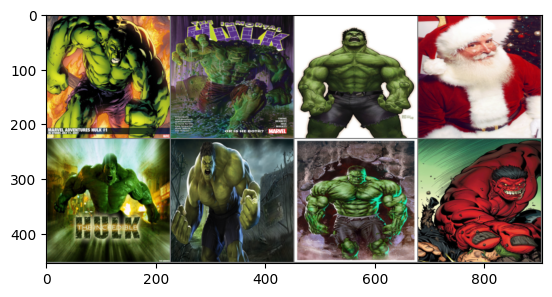

In [ ]:
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
"".join(f"{classes[labels[j]]:15s}" for j in range(8))

# Model 훈련(CPU 사용)

## Custom Model

### 대략적인 개요 (Drawing was helped by NN SVG)


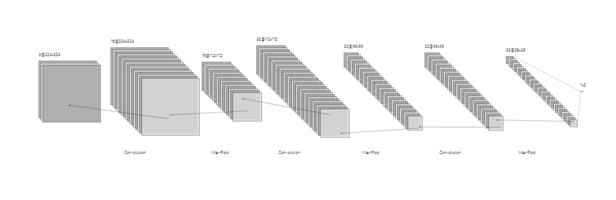



In [ ]:
class santahulk(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()

        # First Layer
        # Input image size = 224 x 224 x 3
        # number of kennels = 16
        # Outputsize = 112 x 112 x 16

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=0.25))

        # Second Layer
        # Input image size = 112 x 112 x 16
        # number of kennels = 32
        # Outputsize = 56 x 56 x 32


        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # Third Layer
        # Input image size = 56 x 56 x 32
        # number of kennels = 32
        # Outputsize = 28 x 28 x 32

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=0.25))


        # Fully connected layer 2 outputs
        self.fc1 = torch.nn.Linear(28*28*32, num_classes, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)



    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out

santahulk = santahulk(num_classes = 2)


In [ ]:
input = torch.randn((8,3,224,224))
output = santahulk(input)
print(output.shape)

print(santahulk)

torch.Size([8, 2])
santahulk(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25, inplace=False)
  )
  (fc1): Linear(in_features=25088, out_features=2, bias=True)
)


In [16]:
def calculate_metric(metric_fn, true_y, pred_y):
    if "average" in inspect.getfullargspec(metric_fn).kwonlyargs:
        # getfullargspec(func) : 호출 가능한 개체의 매개 변수의 이름과 기본값을 가져옴 (튜플로 반환)
        # kwonlyargs : 모든 parameter 값 확인
        return metric_fn(true_y, pred_y, average="macro")
        # macro : 평균의 평균을 내는 방법
        # micro : 개수 그자체로 평균을 내는 방법
    else:
        return metric_fn(true_y, pred_y)

# precision, recall, f1, accuracy를 한번에 보여주기 위한 함수
def print_scores(p, r, f1, a, batch_size):
    for name, scores in zip(("precision", "recall", "F1", "accuracy"), (p, r, f1, a)):
        print(f"\t{name.rjust(14, ' ')}: {sum(scores)/batch_size:.4f}")

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# GPU 사용 여부 결정해주기!

learning_rate = 0.01

In [ ]:
# 모델 가져와 gpu에 할당
model = santahulk.to(device)

# 에포크, 배치 크기 지정
epochs = 5
batch_size = 5

# 손실함수 정의(loss function)
loss_function = nn.CrossEntropyLoss()
# 크로스 엔트로피 : 실제 값과 예측 값의 차이를 줄이기 위한 엔트로피
# 다중 클래스 문제에서 잘 작동

# 옵티마이저 : Adam
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
# model(신경망) 파라미터를 optimizer에 전달해줄 때 nn.Module의 parameters() 메소드를 사용
# Karpathy's learning rate 사용 (3e-4)

start_ts = time.time() # 초단위 시간 반환

losses = []
trainbatches = len(trainloader)
testbatches = len(testloader)

# 에포크 : training + evaluation
for epoch in range(epochs):
    total_loss = 0

    # tqdm : 진행률 프로세스바
    progress = tqdm(enumerate(trainloader), desc="Loss: ", total=trainbatches)

    # ----------------- TRAINING  --------------------
    # training 모델로 설정
    model.train()

    for i, data in progress:
        X, y = data[0].to(device), data[1].to(device)

        # 단일 배치마다 training 단계
        model.zero_grad() # 모든 모델의 파라미터 미분값을 0으로 초기화
        outputs = model(X)
        loss = loss_function(outputs, y)
        loss.backward()
        optimizer.step() # step() : 파라미터를 업데이트함

        # training data 가져오기
        current_loss = loss.item() # item() : 키, 값 반환
        total_loss += current_loss

        # set_description : 진행률 프로세스바 업데이트
        progress.set_description("Loss: {:.4f}".format(total_loss/(i+1)))

    # out of memory in GPU 뜰 때
    if torch.cuda.is_available():
        torch.cuda.empty_cache() # # GPU 캐시 데이터 삭제

    # ----------------- TEST  -----------------
    test_losses = 0
    precision, recall, f1, accuracy = [], [], [], []

    # set model to evaluating (testing)
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(testloader):
            X, y = data[0].to(device), data[1].to(device)

            outputs = model(X) # 네트워크로부터 예측값 가져오기

            test_losses += loss_function(outputs, y)

            predicted_classes = torch.max(outputs, 1)[1] # 네트워크의 예측값으로부터 class 값(범주) 가져오기

            # P/R/F1/A metrics for batch 계산
            for acc, metric in zip((precision, recall, f1, accuracy),
                                   (precision_score, recall_score, f1_score, accuracy_score)):
                acc.append(
                    calculate_metric(metric, y.cpu(), predicted_classes.cpu())
                )

    print(f"Epoch {epoch+1}/{epochs}, training loss: {total_loss/trainbatches}, validation loss: {test_losses/testbatches}")
    print_scores(precision, recall, f1, accuracy, testbatches)
    losses.append(total_loss/trainbatches) # 학습률을 위한 작업
print(f"Training time: {time.time()-start_ts}s")


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5, training loss: 0.75041543841362, validation loss: 0.584671676158905
	     precision: 0.8000
	        recall: 0.8333
	            F1: 0.7083
	      accuracy: 0.7143


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 2/5, training loss: 0.6027018845081329, validation loss: 0.47823435068130493
	     precision: 0.8333
	        recall: 0.9167
	            F1: 0.8250
	      accuracy: 0.8571


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 3/5, training loss: 0.4681430488824844, validation loss: 0.3777101933956146
	     precision: 0.8750
	        recall: 0.9583
	            F1: 0.8939
	      accuracy: 0.9286


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 4/5, training loss: 0.35463944524526597, validation loss: 0.24397043883800507
	     precision: 1.0000
	        recall: 1.0000
	            F1: 1.0000
	      accuracy: 1.0000


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 5/5, training loss: 0.1990060843527317, validation loss: 0.21900375187397003
	     precision: 0.8750
	        recall: 0.9583
	            F1: 0.8939
	      accuracy: 0.9286
Training time: 42.07651376724243s


In [ ]:
import requests
from io import BytesIO

# santahulk_prediction 함수
# url과 model을 받아서 이미지와 예측 값을 띄워준다.

def santahulk_prediction(url,model):
    # Santa Hulk model 가져오기!


    model.eval()

    # 모델을 원하는 모양으로 바꿔주기!
    preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
    ])

    # Google 에서 url을 통해 이미지 가져오기!
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = preprocess(img).unsqueeze(0)
    # Batch demension 없애주기!

    # Make predictions
    with torch.no_grad():
        outputs = model(img)
        _, predicted = torch.max(outputs, 1)


    plt.imshow(np.squeeze(img).permute(1, 2, 0).clamp(0,1))
    plt.axis('off')
    plt.title(classes[predicted.item()])
    plt.show()

## 문제점 및 해결 방안

우리가 만든 Custom model로도 충분히 학습이 잘 되었지만,

고전적이지 않고 특이한 모습을 가진 산타나 헐크에 대해서는 잘 학습되지 않았다.

- (e.g. 초록색 산타, 빨간색 헐크)

이에 학습을 더 잘 시킬 수 있는 무엇일지 생각하여 보았다.

'



우리의 image 수가 한정적이었기 때문에, 다음과 같은 두가지 방법을 떠올릴 수 있었다.


'


'




*1. Data augmentation (데이터 증강)*



*2. Transfer learning (전이 학습)*

'

'





먼저, 갖고 있는 이미지들의 밝기, 명암 등을 바꿔주거나 이미지들을 돌리거나 자르는 방식으로 데이터 증강을 해주는 방법이 있다.

 그러나 이 방법 또한, 어느정도 갯수 이상의 데이터가 있어야 한다.
실제 pytorch의 transform을 이용하여 해봤으나, 이미지가 너무 적어 효과적이지 않았다.

다음은 transfer learning 이다. 일반적인 이미지들에 대해서 학습이 되어 있는
모델을 가져와서 우리 데이터에 맞게 튜닝해주는 것이다.

여러번의 시도 이후, 이번 학습에서는 Resnet50을 가져와서 Santa와 Hulk에 대해 학습을 시키고자 하였다.

## RESNET 이용해서 전이학습 시키기










![image.png](https://blog.kakaocdn.net/dn/dWvmSt/btq8HUxeGbt/RYjh295Vsf1UTixT1xsKNk/img.png)

Resnet architecture example (34 Layers)
![image.png](https://cdn-lfs.huggingface.co/datasets/huggingface/documentation-images/cd6b9b5c48bf3bc68a5ba981c1f374f90f5c0d52f19f1d74db85e3f42eee04f8?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27resnet_architecture.png%3B+filename%3D%22resnet_architecture.png%22%3B&response-content-type=image%2Fpng&Expires=1702645787&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwMjY0NTc4N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9kYXRhc2V0cy9odWdnaW5nZmFjZS9kb2N1bWVudGF0aW9uLWltYWdlcy9jZDZiOWI1YzQ4YmYzYmM2OGE1YmE5ODFjMWYzNzRmOTBmNWMwZDUyZjE5ZjFkNzRkYjg1ZTNmNDJlZWUwNGY4P3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=cFmOGMK4Gl4jOfGFSgGTGQTbkQEzcD8yRJAXsgabzom0JAd0Ggxk1u3GTojJtBGnGKx3NMgFDxrVPJI39iJ0wVMIL1TW19K1kERbaYigCotO6bavHoTxIvP9v%7EIe9VkIVFG4IIRr3hBPwoI7RX92rq7mwaPWdU9K5TH9yV4T4rCLL-OcdlRhHWoU4Cg7W3RWsvcp-z4UbGFK9ueK2BkN-k17yMVu-RpH2jO4vwMREzYZ-kC9zBMCwmPoU-ixZE7buKCPFz%7EFQoT1105Ip02SkkC9ykPLe1QeLOd7lLUhIXzxxHgs1OBZ1wupcBJQ9qilcvM7Uuexq3iJp%7ET%7E6aOQnw__&Key-Pair-Id=KVTP0A1DKRTAX)

In [7]:
class SantaHulkNet(nn.Module): # MnistResNet은 nn.Module 상속
  def __init__(self, in_channels=3):
    super(SantaHulkNet, self).__init__()

    # torchvision.models에서 사전훈련된 resnet 모델 가져오기
    self.model = models.resnet50(weights='ResNet50_Weights.DEFAULT')

    # 50 Layers

    # input channel 은 3 (RGB)

    # 원래 ResNet의 첫번째 층
    #self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)

    # 1000개 클래스 대신 2개 클래스로 바꿔주기
    num_ftrs = self.model.fc.in_features
    # nn.Linear(in_features, out_features ...)
    self.model.fc = nn.Linear(num_ftrs, 2)

  def forward(self, x): # 모델에 있는 foward 함수 그대로 가져오기
    return self.model(x)


SH_resnet = SantaHulkNet()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 54.3MB/s]


In [8]:
input = torch.randn((8,3,224,224))
output = SH_resnet(input)
print(output.shape)

print(SH_resnet)

torch.Size([8, 2])
SantaHulkNet(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): 

In [9]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# GPU 사용 여부 결정해주기!

In [10]:
def calculate_metric(metric_fn, true_y, pred_y):
    if "average" in inspect.getfullargspec(metric_fn).kwonlyargs:
        # getfullargspec(func) : 호출 가능한 개체의 매개 변수의 이름과 기본값을 가져옴 (튜플로 반환)
        # kwonlyargs : 모든 parameter 값 확인
        return metric_fn(true_y, pred_y, average="macro")
        # macro : 평균의 평균을 내는 방법
        # micro : 개수 그자체로 평균을 내는 방법
    else:
        return metric_fn(true_y, pred_y)

# precision, recall, f1, accuracy를 한번에 보여주기 위한 함수
def print_scores(p, r, f1, a, batch_size):
    for name, scores in zip(("precision", "recall", "F1", "accuracy"), (p, r, f1, a)):
        print(f"\t{name.rjust(14, ' ')}: {sum(scores)/batch_size:.4f}")

In [11]:
# 모델 가져와 gpu에 할당
model = SH_resnet.to(device)

# 에포크, 배치 크기 지정
epochs = 5
batch_size = 5

# 손실함수 정의(loss function)
loss_function = nn.CrossEntropyLoss()
# 크로스 엔트로피 : 실제 값과 예측 값의 차이를 줄이기 위한 엔트로피
# 다중 클래스 문제에서 잘 작동

# 옵티마이저 : Adam
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
# model(신경망) 파라미터를 optimizer에 전달해줄 때 nn.Module의 parameters() 메소드를 사용
# Karpathy's learning rate 사용 (3e-4)

start_ts = time.time() # 초단위 시간 반환

losses = []
trainbatches = len(trainloader)
testbatches = len(testloader)

# 에포크 : training + evaluation
for epoch in range(epochs):
    total_loss = 0

    # tqdm : 진행률 프로세스바
    progress = tqdm(enumerate(trainloader), desc="Loss: ", total=trainbatches)

    # ----------------- TRAINING  --------------------
    # training 모델로 설정
    model.train()

    for i, data in progress:
        X, y = data[0].to(device), data[1].to(device)

        # 단일 배치마다 training 단계
        model.zero_grad() # 모든 모델의 파라미터 미분값을 0으로 초기화
        outputs = model(X)
        loss = loss_function(outputs, y)
        loss.backward()
        optimizer.step() # step() : 파라미터를 업데이트함

        # training data 가져오기
        current_loss = loss.item() # item() : 키, 값 반환
        total_loss += current_loss

        # set_description : 진행률 프로세스바 업데이트
        progress.set_description("Loss: {:.4f}".format(total_loss/(i+1)))

    # out of memory in GPU 뜰 때
    if torch.cuda.is_available():
        torch.cuda.empty_cache() # # GPU 캐시 데이터 삭제

    # ----------------- TEST  -----------------
    test_losses = 0
    precision, recall, f1, accuracy = [], [], [], []

    # set model to evaluating (testing)
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(testloader):
            X, y = data[0].to(device), data[1].to(device)

            outputs = model(X) # 네트워크로부터 예측값 가져오기

            test_losses += loss_function(outputs, y)

            predicted_classes = torch.max(outputs, 1)[1] # 네트워크의 예측값으로부터 class 값(범주) 가져오기

            # P/R/F1/A metrics for batch 계산
            for acc, metric in zip((precision, recall, f1, accuracy),
                                   (precision_score, recall_score, f1_score, accuracy_score)):
                acc.append(
                    calculate_metric(metric, y.cpu(), predicted_classes.cpu())
                )

    print(f"Epoch {epoch+1}/{epochs}, training loss: {total_loss/trainbatches}, validation loss: {test_losses/testbatches}")
    print_scores(precision, recall, f1, accuracy, testbatches)
    losses.append(total_loss/trainbatches) # 학습률을 위한 작업
print(f"Training time: {time.time()-start_ts}s")


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5, training loss: 0.5153095185756683, validation loss: 0.10659301280975342
	     precision: 1.0000
	        recall: 1.0000
	            F1: 1.0000
	      accuracy: 1.0000


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 2/5, training loss: 0.20025505051016806, validation loss: 0.02217770740389824
	     precision: 1.0000
	        recall: 1.0000
	            F1: 1.0000
	      accuracy: 1.0000


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 3/5, training loss: 0.07655837591737509, validation loss: 0.04308108612895012
	     precision: 1.0000
	        recall: 1.0000
	            F1: 1.0000
	      accuracy: 1.0000


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 4/5, training loss: 0.032453714730218054, validation loss: 0.040369994938373566
	     precision: 1.0000
	        recall: 1.0000
	            F1: 1.0000
	      accuracy: 1.0000


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 5/5, training loss: 0.09324566330760717, validation loss: 0.02168331667780876
	     precision: 1.0000
	        recall: 1.0000
	            F1: 1.0000
	      accuracy: 1.0000
Training time: 307.5303180217743s


# Prediction 결과 확인해보기!

예측 결과를 이미지와 class로 보여주는 함수 정의!

input은 가져오고 싶은 이미지의 url과 모델(여기서는 SH_resnet)

In [12]:
import requests
from io import BytesIO

# SH_prediction 함수
# url과 model을 받아서 이미지와 예측 값을 띄워준다.

def SH_prediction(url,model):
    # Santa Hulk model 가져오기!
    model.eval()

    # 모델을 원하는 모양으로 바꿔주기!
    preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
    ])

    # Google 에서 url을 통해 이미지 가져오기!
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = preprocess(img).unsqueeze(0)
    # Batch demension 없애주기!

    # Make predictions
    with torch.no_grad():
        outputs = model(img)
        _, predicted = torch.max(outputs, 1)


    plt.imshow(np.squeeze(img).permute(1, 2, 0).clamp(0,1))
    plt.axis('off')
    plt.title(classes[predicted.item()])
    plt.show()

Google에서 Bing dataset과 겹치지 않는 Santa Claus, Hulk 가져오기!

##1. 다양한 Santa 분류!

### Santa image 분류 (1)

완벽한 모습의 산타

![image.png](https://www.refinery29.com/images/10124831.jpg?format=webp&width=340&height=408&quality=85)

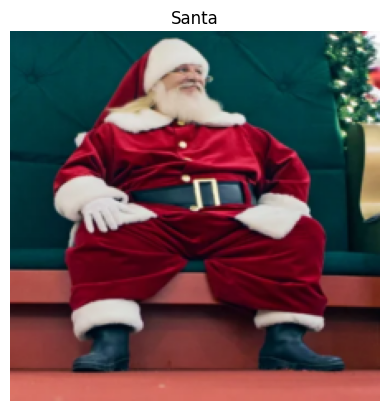

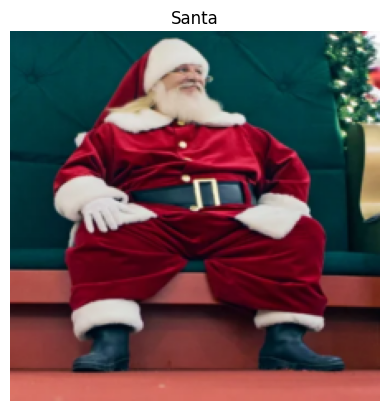

In [ ]:
url1 = 'https://www.refinery29.com/images/10124831.jpg?format=webp&width=340&height=408&quality=85'
# Resnet50 model
model = santahulk.to(device)
santahulk_prediction(url1,model)

# Custom model
model = SH_resnet.to(device)
SH_prediction(url1,model)

### Santa image 분류 (2)

바른 자세로 앉아있지 않은 산타

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRiLgyqFngkHXSfnoxoWEGDkE_C0UO83NarUw&usqp=CAU)

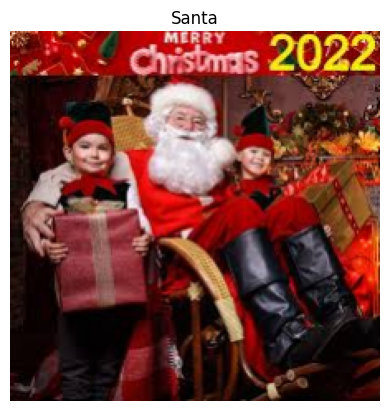

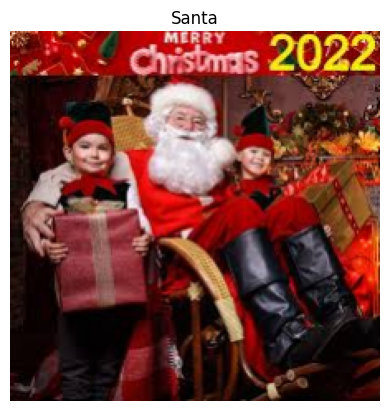

In [ ]:
url2 = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRiLgyqFngkHXSfnoxoWEGDkE_C0UO83NarUw&usqp=CAU'
model = SH_resnet.to(device)
SH_prediction(url2, model)

model = santahulk.to(device)
santahulk_prediction(url2, model)

### Santa image 분류 (3)

다른 물체가 포함되어 있는 산타 - 루돌프와 함께인 산타

![image.png](https://w0.peakpx.com/wallpaper/428/986/HD-wallpaper-merry-christmas-rudolf-red-craciun-christmas-man-rudolf-santa-claus-winter-snow-reindeer-blue.jpg)

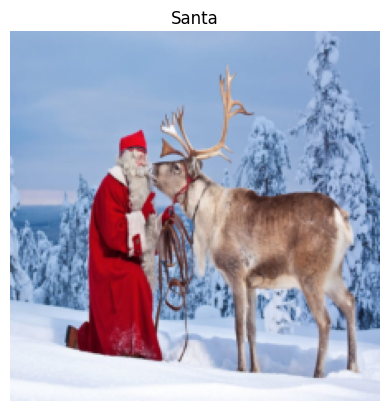

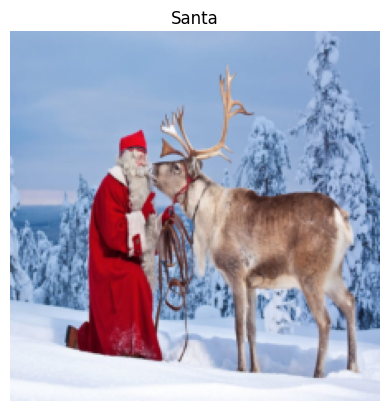

In [ ]:
url3 = 'https://w0.peakpx.com/wallpaper/428/986/HD-wallpaper-merry-christmas-rudolf-red-craciun-christmas-man-rudolf-santa-claus-winter-snow-reindeer-blue.jpg'
model = SH_resnet.to(device)
SH_prediction(url3, model)

model = santahulk.to(device)
santahulk_prediction(url3, model)

### Santa image 분류 (4)

초록색 옷을 입은 산타
![image.png](https://as1.ftcdn.net/v2/jpg/01/30/36/22/1000_F_130362299_xMVwwJNpe2XDhyc2L3xSnKaKzurLfm5T.jpg)

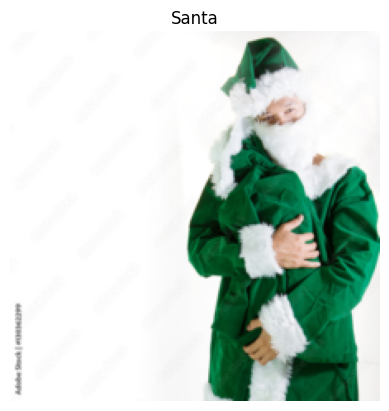

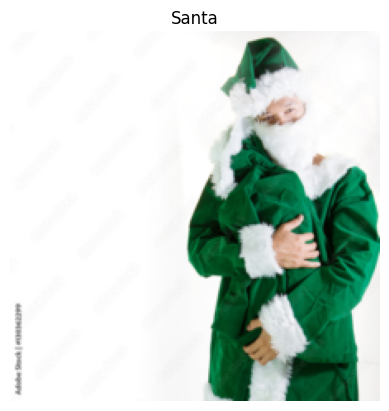

In [ ]:
url4 = 'https://as1.ftcdn.net/v2/jpg/01/30/36/22/1000_F_130362299_xMVwwJNpe2XDhyc2L3xSnKaKzurLfm5T.jpg'
model = SH_resnet.to(device)
SH_prediction(url4, model)
model = santahulk.to(device)
santahulk_prediction(url4, model)

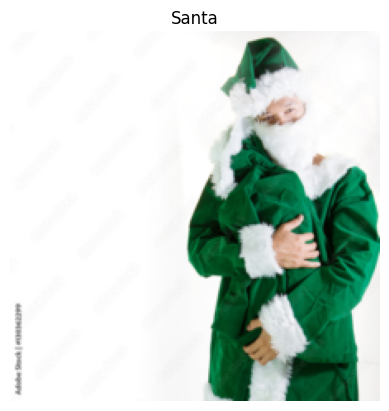

In [15]:
url4 = 'https://as1.ftcdn.net/v2/jpg/01/30/36/22/1000_F_130362299_xMVwwJNpe2XDhyc2L3xSnKaKzurLfm5T.jpg'
model = SH_resnet.to(device)
SH_prediction(url4, model)

## 2. 다양한 Hulk 분류!

### Hulk image 분류 (1)

완벽한 모습의 헐크

![image.png](https://thesparrow.news/wp-content/uploads/2022/02/The-history-behind-our-beloved-monstrous-green-Hulk-image-source-.jpg)

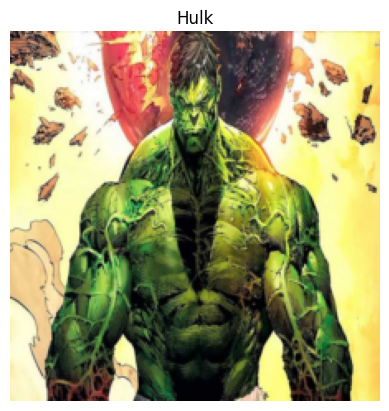

In [17]:
url5 = 'https://thesparrow.news/wp-content/uploads/2022/02/The-history-behind-our-beloved-monstrous-green-Hulk-image-source-.jpg'
model = SH_resnet.to(device)
SH_prediction(url5, model)


###Hulk image 분류 (2)

색깔이 일정하지 않은 헐크

![image.png](https://i5.walmartimages.com/seo/Marvel-Legends-Series-Compound-Hulk-Kids-Toy-Action-Figure-Set-for-Boys-and-Girls-2-Pieces_43d04427-322e-4377-a3ab-ddfb9e4e09e6.eadaa253e184c6c7e0e0d27abc2aaea3.jpeg?odnHeight=2000&odnWidth=2000&odnBg=FFFFFF)

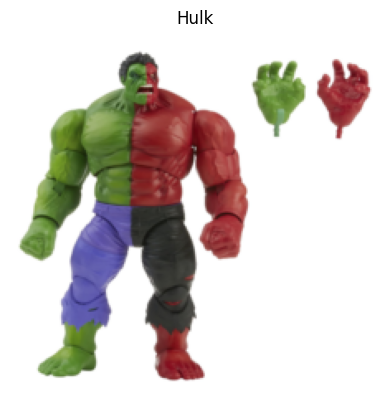

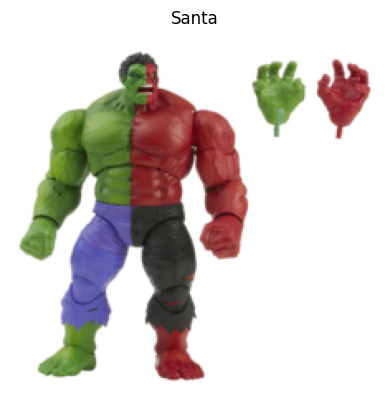

In [ ]:
url6 = 'https://i5.walmartimages.com/seo/Marvel-Legends-Series-Compound-Hulk-Kids-Toy-Action-Figure-Set-for-Boys-and-Girls-2-Pieces_43d04427-322e-4377-a3ab-ddfb9e4e09e6.eadaa253e184c6c7e0e0d27abc2aaea3.jpeg?odnHeight=2000&odnWidth=2000&odnBg=FFFFFF'
model = SH_resnet.to(device)
SH_prediction(url6, model)

model = santahulk.to(device)
santahulk_prediction(url6, model)

###Hulk image 분류 (3)

붉은 색 헐크

색깔이 이미지 분류에 영향을 미치는지 체크!

![image.png](https://www.giantfreakinrobot.com/wp-content/uploads/2021/05/red-hulk-1200x675.jpg)

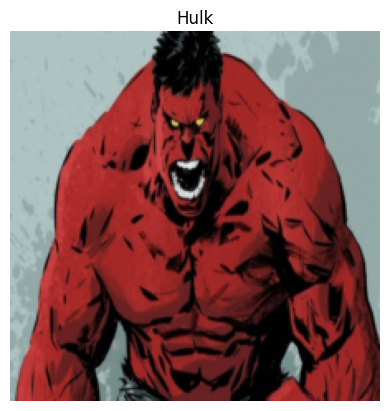

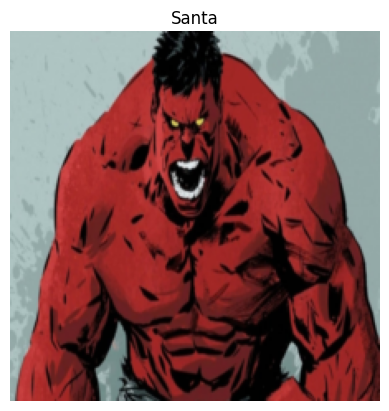

In [ ]:
url6 = 'https://www.giantfreakinrobot.com/wp-content/uploads/2021/05/red-hulk-1200x675.jpg'
model = SH_resnet.to(device)
SH_prediction(url6, model)

model = santahulk.to(device)
santahulk_prediction(url6, model)

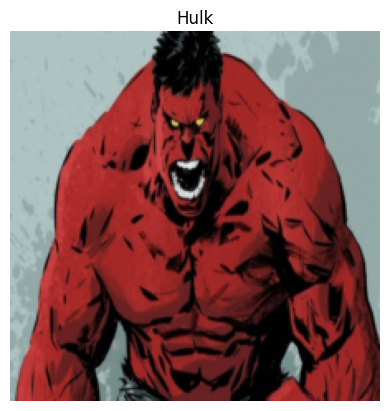

In [16]:
url6 = 'https://www.giantfreakinrobot.com/wp-content/uploads/2021/05/red-hulk-1200x675.jpg'
model = SH_resnet.to(device)
SH_prediction(url6, model)

# 추가 학습

지금까지는 Custom data를 만든 후, 이를 이용하여 custom 모델과 Resnet 모델을 각각 훈련시키고, 이 둘을 비교 분석해보았다.

다음 섹션에서는 소벨 필터(Edge detector)를 우리가 가진 이미지들에 적용시켜 새로운 데이터셋을 만들어 보고, 이 데이터를 통해 학습한 결과를 기존 결과와 비교해보고자 한다.



##Sobel Filter

sobel filter는 edge를 detect하는 filter이다.

이는 특히 차선 인식과 같은 영상 처리에 유용하다.

'

'


여기서는 우리의 모델들에 image를 그대로 넣기 전에,

sobel filter를 적용시켜보려고 한다.

'

'

Sobel filter를 적용시켜 만든 이미지 데이터 셋으로 학습을 시켰을 때,
성능과 학습 시간에 차이가 나는지 알아보고자 한다.

## Sobel filter dataset 만들기

In [6]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/SWPROGRAMMING/data
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SWPROGRAMMING/data
/content/drive/MyDrive/SWPROGRAMMING/data


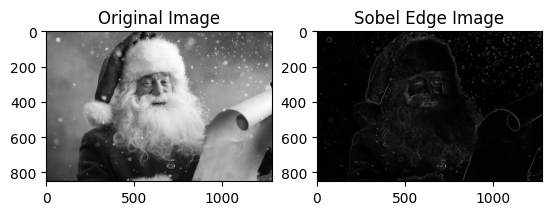

In [7]:
#Do not reinvent the wheel!
# 기존의 Sobel filter를 가져온다.

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters

# Read the image
image = io.imread('/content/drive/MyDrive/SWPROGRAMMING/data/train/Santa/Image_1.jpg', as_gray=True)

# Apply Sobel edge detector
edges = filters.sobel(image)

# Display the original and edge-detected images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Sobel Edge Image')
plt.show()

In [8]:
%cd /content/drive/MyDrive/SWPROGRAMMING

!mkdir sobeldata

/content/drive/MyDrive/SWPROGRAMMING


In [9]:
!ls

data  sobeldata  swproject.ipynb  testdata


In [11]:
# Sobel filter를 적용시킨 image를 저장시켜준다.

from PIL import Image
import numpy as np
import os
from skimage.filters import sobel

def apply_sobel_filter_to_images(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        for dir in dirs:
            input_class_dir = os.path.join(root, dir)
            output_class_dir = input_class_dir.replace(input_dir, output_dir)

            os.makedirs(output_class_dir, exist_ok=True)

            # Process images in the folder
            for filename in os.listdir(input_class_dir):
                filepath = os.path.join(input_class_dir, filename)
                if os.path.isfile(filepath):  # Check if it's a file
                    # Apply Sobel edge detection to the image using scikit-image
                    img = Image.open(filepath)
                    immatriz = np.array(img)
                    result = sobel(immatriz)
                    im_sobel = Image.fromarray((result * 255).astype(np.uint8))

                    # Save the processed image to the output directory as PNG
                    output_filename = os.path.join(output_class_dir, filename)
                    im_sobel.save(output_filename, 'PNG')  # Save as PNG format

or_dataset_path = '/content/drive/MyDrive/SWPROGRAMMING/data'

# Data에 있는 이미지들에 sobel filter를 적용해준 뒤, sobeldata 폴더에 저장해준다!

# Dataset Folder for resized images

re_dataset_path = '/content/drive/MyDrive/SWPROGRAMMING/sobeldata'


apply_sobel_filter_to_images(or_dataset_path, re_dataset_path)

In [17]:
# Data preimage processing
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                ])

# 이미지 크기가 다 다르기 때문에 128,128 로 조정해주고 정규화 작업!

trainset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/SWPROGRAMMING/sobeldata/train",
                                                    transform = transform)

testset = torchvision.datasets.ImageFolder(root = "/content/drive/MyDrive/SWPROGRAMMING/sobeldata/test",
                                                    transform = transform)



In [18]:
trainset.__getitem__(9)

# trainset의 10번째 이미지 가져오기!

(tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]),
 0)

In [19]:
img, label = trainset[10]
print(len(trainset))
classes = trainset.classes

# trainset의 class 명 확인!

print(classes)

for i in range(len(trainset)):
    img, label = trainset[i]
    print(label, classes[label])

75
['Hulk', 'Santa']
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
0 Hulk
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa
1 Santa


In [32]:
trainloader = DataLoader(trainset, batch_size = 8, shuffle = True, num_workers = 1)

testloader = DataLoader(testset, batch_size = 8, shuffle = False, num_workers = 1)


# Batch 한개 당 8장의 이미지씩 가져오기!, 이미지는 무작위로 섞기!


In [21]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(labels)
print(images)

# 1번째 batch, 2번째 batch 순으로 이미지 가져와보기!
# 이 코드를 반복하면 처음에는 1번째 batch 다음에는 2번째 batch 순으로 이미지가 8개씩 업로드 된다!

tensor([1, 1, 1, 0, 0, 1, 1, 0])
tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000

In [22]:
print(images.shape)

# 이미지 크기 확인!
# Batch 에 8개의 이미지가 있고, RGB 3 class 이며, 각각 128 by 128 임을 확인!

torch.Size([8, 3, 224, 224])


In [23]:
def imshow(img):
    img = img/2 +0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1,2,0)))

    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)

# 이미지 보여주는 함수 정의!

(3, 454, 906)
(454, 906, 3)
torch.Size([8, 3, 224, 224])


'Santa          Santa          Santa          Hulk           Hulk           Santa          Santa          Hulk           '

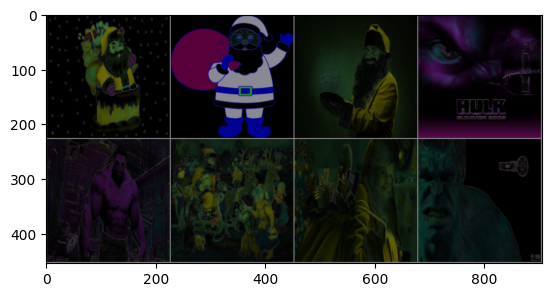

In [24]:
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
"".join(f"{classes[labels[j]]:15s}" for j in range(8))

## sobelnet 학습

In [26]:
class santasobel(nn.Module): # MnistResNet은 nn.Module 상속
  def __init__(self, in_channels=3):
    super(santasobel, self).__init__()

    # torchvision.models에서 사전훈련된 resnet 모델 가져오기
    self.model = models.resnet50(weights='ResNet50_Weights.DEFAULT')

    # 50 Layers

    # input channel 은 3 (RGB)

    # 원래 ResNet의 첫번째 층
    #self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)

    # 1000개 클래스 대신 2개 클래스로 바꿔주기
    num_ftrs = self.model.fc.in_features
    # nn.Linear(in_features, out_features ...)
    self.model.fc = nn.Linear(num_ftrs, 2)

  def forward(self, x): # 모델에 있는 foward 함수 그대로 가져오기
    return self.model(x)


santasobel = santasobel()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 59.9MB/s]


In [29]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# GPU 사용 여부 결정해주기!

In [30]:
def calculate_metric(metric_fn, true_y, pred_y):
    if "average" in inspect.getfullargspec(metric_fn).kwonlyargs:
        # getfullargspec(func) : 호출 가능한 개체의 매개 변수의 이름과 기본값을 가져옴 (튜플로 반환)
        # kwonlyargs : 모든 parameter 값 확인
        return metric_fn(true_y, pred_y, average="macro")
        # macro : 평균의 평균을 내는 방법
        # micro : 개수 그자체로 평균을 내는 방법
    else:
        return metric_fn(true_y, pred_y)

# precision, recall, f1, accuracy를 한번에 보여주기 위한 함수
def print_scores(p, r, f1, a, batch_size):
    for name, scores in zip(("precision", "recall", "F1", "accuracy"), (p, r, f1, a)):
        print(f"\t{name.rjust(14, ' ')}: {sum(scores)/batch_size:.4f}")

In [33]:
# 모델 가져와 gpu에 할당
model = santasobel.to(device)

# 에포크, 배치 크기 지정
epochs = 5
batch_size = 5

# 손실함수 정의(loss function)
loss_function = nn.CrossEntropyLoss()
# 크로스 엔트로피 : 실제 값과 예측 값의 차이를 줄이기 위한 엔트로피
# 다중 클래스 문제에서 잘 작동

# 옵티마이저 : Adam
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
# model(신경망) 파라미터를 optimizer에 전달해줄 때 nn.Module의 parameters() 메소드를 사용
# Karpathy's learning rate 사용 (3e-4)

start_ts = time.time() # 초단위 시간 반환

losses = []
trainbatches = len(trainloader)
testbatches = len(testloader)

# 에포크 : training + evaluation
for epoch in range(epochs):
    total_loss = 0

    # tqdm : 진행률 프로세스바
    progress = tqdm(enumerate(trainloader), desc="Loss: ", total=trainbatches)

    # ----------------- TRAINING  --------------------
    # training 모델로 설정
    model.train()

    for i, data in progress:
        X, y = data[0].to(device), data[1].to(device)

        # 단일 배치마다 training 단계
        model.zero_grad() # 모든 모델의 파라미터 미분값을 0으로 초기화
        outputs = model(X)
        loss = loss_function(outputs, y)
        loss.backward()
        optimizer.step() # step() : 파라미터를 업데이트함

        # training data 가져오기
        current_loss = loss.item() # item() : 키, 값 반환
        total_loss += current_loss

        # set_description : 진행률 프로세스바 업데이트
        progress.set_description("Loss: {:.4f}".format(total_loss/(i+1)))

    # out of memory in GPU 뜰 때
    if torch.cuda.is_available():
        torch.cuda.empty_cache() # # GPU 캐시 데이터 삭제

    # ----------------- TEST  -----------------
    test_losses = 0
    precision, recall, f1, accuracy = [], [], [], []

    # set model to evaluating (testing)
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(testloader):
            X, y = data[0].to(device), data[1].to(device)

            outputs = model(X) # 네트워크로부터 예측값 가져오기

            test_losses += loss_function(outputs, y)

            predicted_classes = torch.max(outputs, 1)[1] # 네트워크의 예측값으로부터 class 값(범주) 가져오기

            # P/R/F1/A metrics for batch 계산
            for acc, metric in zip((precision, recall, f1, accuracy),
                                   (precision_score, recall_score, f1_score, accuracy_score)):
                acc.append(
                    calculate_metric(metric, y.cpu(), predicted_classes.cpu())
                )

    print(f"Epoch {epoch+1}/{epochs}, training loss: {total_loss/trainbatches}, validation loss: {test_losses/testbatches}")
    print_scores(precision, recall, f1, accuracy, testbatches)
    losses.append(total_loss/trainbatches) # 학습률을 위한 작업
print(f"Training time: {time.time()-start_ts}s")


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/5, training loss: 0.607661384344101, validation loss: 0.46173012256622314
	     precision: 0.8125
	        recall: 0.8750
	            F1: 0.7667
	      accuracy: 0.7857


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 2/5, training loss: 0.13434954471886157, validation loss: 0.24923498928546906
	     precision: 0.8750
	        recall: 0.9583
	            F1: 0.8939
	      accuracy: 0.9286


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 3/5, training loss: 0.04435035213828087, validation loss: 0.25573456287384033
	     precision: 0.8750
	        recall: 0.9583
	            F1: 0.8939
	      accuracy: 0.9286


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 4/5, training loss: 0.014626996195875108, validation loss: 0.2967560291290283
	     precision: 0.8750
	        recall: 0.9583
	            F1: 0.8939
	      accuracy: 0.9286


Loss:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 5/5, training loss: 0.0124196530028712, validation loss: 0.3060514032840729
	     precision: 0.8750
	        recall: 0.9583
	            F1: 0.8939
	      accuracy: 0.9286
Training time: 299.3465371131897s


# 결론

이번 프로젝트에서 Custom dataset을 구축하고, 이를 이용해서 여러 모델들을 학습해 보았다.

'

'


먼저, Custom dataset의 경우, bing downloader를 이용하면 편하다는 것을 알 수 있었지만 그것도 명확한 한계가 있었다.

'

'


다음으로 모델의 경우, Custom model, Resnet50, sobelresnet을 구축해보았다.

'



Custom model이 학습시키는데는 가장 적은 시간이 필요했지만, 데이터 셋이 작은만큼 전형적이지 않은 물체를 분류함에 있어서는 명확한 한계가 있었다.

반면 Resnet50을 이용한 학습은 시간이 가장 오래걸렸지만, 아주 정확했고 전형적이지 않은 산타와 헐크에 대해서도 아주 우수한 예측 결과를 보였다.

Sobelfilter를 적용시킨 후 학습한 Resnet의 경우, 기존의 Resnet 보다는 조금 더 짧은 훈련 시간이 필요했다.

그러나 그 대신, 기존의 Resnet50보다는 부족한 성능을 보였다.


'

'

결론적으로, 만약 한정된 dataset으로 정확한 예측이 필요한 Task를 다룬다면, 기존의 신경망을 가져다가 우리의 dataset에 맞게 튜닝해서 쓰는게 가장 좋은 방법이다.

반면, 데이터 셋이 많다면 학습 시간 단축을 위해 sobelfilter로 전처리를 한 후, 학습을 시키는 것도 좋은 방법일 것이다.




# 향후 연구 계획

지금까지는 2개의 Class 만으로 학습을 해보았다.

추후 연구에서는 2개가 아닌 다중 클래스 분류 문제를 다뤄보면 좋을 것이다.